In [1]:
# Importing libraries required
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [3]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
We will now plot the above data 

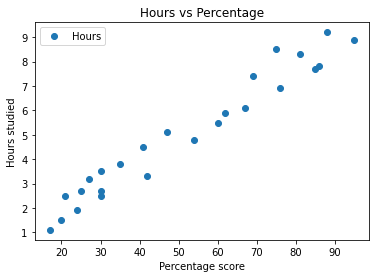

In [8]:
# Plotting the distribution of scores
data.plot(x='Scores', y='Hours', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Percentage score')  
plt.ylabel('Hours studied')  
plt.show()

From the plotted graph, we can conclude that there is a positive linear relation between the number of hours studied and percentage of score.

PREPARING THE DATA
Now we will prepare the data for further proceedings and training.


In [10]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [11]:
#split this data into training and test sets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [12]:
#training the algorithm
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


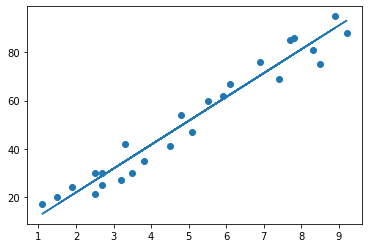

In [13]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [14]:
print(X_test) # Testing data-In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [15]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [35]:
#What will be predicted score if a student studies for 9.5 hrs/day
rows, cols = (1, 1)
hours= [[9.5]*cols]*rows
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.5]]
Predicted Score = 96.16939660753593


In [36]:
#evaluating the model
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
